In [82]:
# mount drive from google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [83]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# define directiory and classes
data_dir = '/content/drive/MyDrive/Posture_data_F'
classes = (os.listdir(data_dir))
classes = [classes[0], classes[1], classes[2]]
classes

['accelerometer', 'magnetometer', 'gyroscope']

In [85]:
# join root directory with subfolders
data_count = []
for i in classes:
   data_path = os.path.join(data_dir, i)
   data_count.append(len(os.listdir(data_path)))

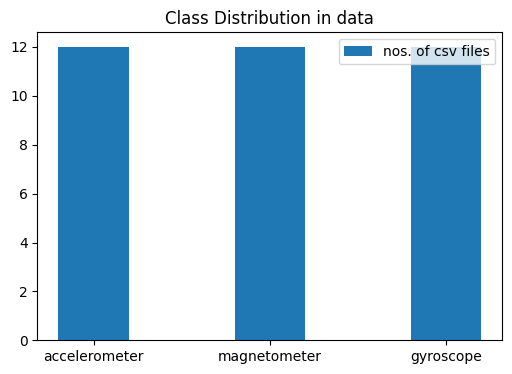

Train :
Number of csv files in accelerometer : 12
Number of csv files in gyroscope : 12
Number of csv files in magnetometer : 12


In [86]:
# Creating a bar plot of the folder and files distributions in root folder ;
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(np.arange(len(data_count)), data_count, width=0.4, align='center', label='nos. of csv files')
ax.set_xticks(np.arange(len(data_count)))
ax.set_xticklabels(classes)
ax.set_title('Class Distribution in data')
ax.legend()
plt.show()

print('Train :')
print(f'Number of csv files in accelerometer : {[data_count][0][0]}')
print(f'Number of csv files in gyroscope : {[data_count][0][1]}')
print(f'Number of csv files in magnetometer : {[data_count][0][2]}')

In [87]:
# subfolders directory
class_path_dir = []
for idx, class_name in enumerate(classes):
   print(idx)
   print(class_name)
   path_dir = os.path.join(data_dir, class_name)
   class_path_dir.append(path_dir)

accelerometer_path = class_path_dir[0]
magnetometer_path = class_path_dir[1]
gyroscope_path = class_path_dir[2]

print(magnetometer_path)
print(accelerometer_path)
print(gyroscope_path)

0
accelerometer
1
magnetometer
2
gyroscope
/content/drive/MyDrive/Posture_data_F/magnetometer
/content/drive/MyDrive/Posture_data_F/accelerometer
/content/drive/MyDrive/Posture_data_F/gyroscope


In [88]:
# csv files directory for magnetometer
num_mag_files = (os.listdir(magnetometer_path))
num_mag_files

['Sitting_Data_Magnetometer_Trial1.csv',
 'Supine_Magnetometer_Trial2.csv',
 'Supine_Magnetometer_Trial1.csv',
 'Lateral_Left_Side_Magnetometer_Trial1.csv',
 'Lateral_Right_Side_Magnetometer_Trial1.csv',
 'unknown_data_magnetometer_trial2.csv',
 'Prone_Magnetometer_Trial2.csv',
 'Prone_Magnetometer_Trial1.csv',
 'Lateral_Left_Side_Magnetometer_Trial2.csv',
 'unknown_data_magnetometer_trial1.csv',
 'Sitting_Data_Magnetometer_Trial2.csv',
 'Lateral_Right_Side_Magnetometer_Trial2.csv']

In [89]:
# csv files directory for accelerometer
num_acc_files = (os.listdir(accelerometer_path))
num_acc_files

['Lateral_Left_Side_Accelerometer_Trial1.csv',
 'Lateral_Left_Side_Accelerometer_Trial2.csv',
 'Supine_Accelerometer_Trial2.csv',
 'Supine_Accelerometer_Trial1.csv',
 'Sitting_Data_Accelerometer_Trial2.csv',
 'unknown_data_accelerometer_trial2.csv',
 'Sitting_Data_Accelerometer_Trial1.csv',
 'Prone_Accelerometer_Trial1.csv',
 'Lateral_Right_Side_Accelerometer_Trial1.csv',
 'Prone_Accelerometer_Trial2.csv',
 'unknown_data_accelerometer_trial1.csv',
 'Lateral_Right_Side_Aceelerometer_Trial2.csv']

In [90]:
# csv files directory for gyroscope
num_gyro_files = (os.listdir(gyroscope_path))
num_gyro_files

['unknown_data_gyroscope_trial1.csv',
 'Lateral_Right_Side_Gyroscope_Trial2.csv',
 'unknown_data_gyroscope_trial2.csv',
 'Sitting_Data_Gyroscope_Trial2.csv',
 'Prone_Gyroscope_Trial1.csv',
 'Prone_Gyroscope_Trial2.csv',
 'Lateral_Left_Side_Gyroscope_Trial2.csv',
 'Supine_Gyroscope_Trial2.csv',
 'Lateral_Left_Side_Gyroscope_Trial1.csv',
 'Sitting_Data_Gyroscope_Trial1.csv',
 'Lateral_Right_Side_Gyroscope_Trial1.csv',
 'Supine_Gyroscope_Trial1.csv']

In [61]:
# Dictionary to store magnetometer DataFrames
dataframes = {}
for idx, file in enumerate(num_mag_files):
  file_mag_path = os.path.join(magnetometer_path, file)
  dataframes[f"df_mg{idx+1}"] = pd.read_csv(file_mag_path, skiprows=1, header=0)

# dataframes['df_mg1'].head()
dataframes

# initialize the empty dataframe
df_mag_concatenated = pd.DataFrame()

# get concatenated datafram, iterates over dataframes
for idx, df in dataframes.items():
  df_mag_concatenated = pd.concat([df_mag_concatenated, df], axis=0, ignore_index=True)

df_mag_concatenated = df_mag_concatenated[['P','X_M','Y_M','Z_M']]
print(df_mag_concatenated.shape)
df_mag_concatenated

(3609, 4)


,P,X_M,Y_M,Z_M
0,Sitting,42.04,23.82,-83.01
1,Sitting,42.22,24.28,-83.50
2,Sitting,42.47,23.58,-82.59
3,Sitting,42.48,23.91,-82.82
4,Sitting,42.20,23.95,-82.45
...,...,...,...,...
3604,Side,4.04,21.57,34.94
3605,Side,3.65,21.19,34.19
3606,Side,3.91,20.92,34.52
3607,Side,4.32,21.02,35.34


In [ ]:
# Dictionary to store accelerometer DataFrames
dataframes = {}
for idx, file in enumerate(num_acc_files):
  file_acc_path = os.path.join(accelerometer_path, file)
  dataframes[f"df_acc{idx+1}"] = pd.read_csv(file_acc_path, skiprows=1, header=0)

dataframes

## initialize the empty dataframe
df_acc_concatenated = pd.DataFrame()

# get concatenated datafram, iterates over dataframes
for idx, df in dataframes.items():
  df_acc_concatenated = pd.concat([df_acc_concatenated, df], axis=0, ignore_index=True)

df_acc_concatenated = df_acc_concatenated[['P','X_A','Y_A','Z_A']]
df_acc_concatenated = df_acc_concatenated.iloc[:-3]
print(df_acc_concatenated.shape)

In [91]:
# Dictionary to store gyroscope DataFrames
dataframes = {}
for idx, file in enumerate(num_gyro_files):
  file_gyro_path = os.path.join(gyroscope_path, file)
  dataframes[f"df_mg{idx+1}"] = pd.read_csv(file_gyro_path, skiprows=1, header=0)

dataframes

## initialize the empty dataframe
df_gyro_concatenated = pd.DataFrame()

# get concatenated datafram, iterates over dataframes
for idx, df in dataframes.items():
  df_gyro_concatenated = pd.concat([df_gyro_concatenated, df], axis=0, ignore_index=True)

df_gyro_concatenated = df_gyro_concatenated[['P','X_G','Y_G','Z_G']]
df_gyro_concatenated = df_gyro_concatenated.iloc[:-3]
print(df_gyro_concatenated.shape)
df_gyro_concatenated.head()

(3609, 4)


,P,X_G,Y_G,Z_G
0,Unknown,1.71,2.14,-0.73
1,Unknown,1.34,2.20,-0.92
2,Unknown,0.73,2.50,-1.04
3,Unknown,1.10,2.20,-0.67
4,Unknown,1.28,2.08,-0.85


##Perform Machine Learning training

In [79]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Accelerometer ML *model*

In [ ]:
########Accelerometer######
# define input and output
X = df_acc_concatenated[['X_A', 'Y_A', 'Z_A']].values
y = df_acc_concatenated['P'].values

# encoding categorical feature into integer
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model
model = models.Sequential()
model.add(layers.Input(shape=(3,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

num_classes = len(label_encoder.classes_)
print('num_classes', num_classes)

# model training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test_loss', test_loss)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
##### GYROSCOPE#

# define input and output
X = df_gyro_concatenated[['X_G', 'Y_G', 'Z_G']].values
y = df_gyro_concatenated['P'].values

# encode into integer
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# normalization
model = models.Sequential()
model.add(layers.Input(shape=(3,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# define loss function and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
num_classes = len(label_encoder.classes_)
print('num_classes', num_classes)

# moidel training
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test_loss', test_loss)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [60]:
#####Magnetometer########

# define input and output
X = df_mag_concatenated[['X_M', 'Y_M', 'Z_M']].values
y = df_mag_concatenated['P'].values

# encode categorical into integer
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define model
model = models.Sequential()
model.add(layers.Input(shape=(3,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# define loss function and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

num_classes = len(label_encoder.classes_)
print('num_classes', num_classes)

# model training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test_loss', test_loss)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

num_classes 5
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               512       
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 5)                 325       
                                                                 
Total params: 9093 (35.52 KB)
Trainable params: 9093 (35.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 

In [63]:
# get actual index for different classes after encoding
unique_encoded_values = np.unique(y_encoded)
original_labels = label_encoder.inverse_transform(unique_encoded_values)

print("encoded values:",unique_encoded_values )
print("actual classes:", original_labels)

encoded values: [0 1 2 3 4]
actual classes: ['Prone' 'Side' 'Sitting' 'Supine' 'Unknown']


In [64]:
# save trained model and convert into .tflite
model_file = "posture_magf.h5"

model.save("posture_magf.h5")

model = tf.keras.models.load_model(model_file)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("posture_magf.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38520

In [100]:
# save trained model and convert into .tflite
model_file = "posture_gyrof.h5"

model.save("posture_gyrof.h5")

model = tf.keras.models.load_model(model_file)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("posture_gyrof.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


308020

In [93]:
# save trained model and convert into .tflite
model_file = "posture_acc.h5"

model.save("posture_acc.h5")

model = tf.keras.models.load_model(model_file)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("posture_acc.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38536

In [98]:
# Test on some random new data
# new_data = np.array([[0.04, 0.02, -1.01]]) # Actual prone data
# new_data = np.array([[-1.01, -0.03, 0.02]]) # Actual Sitting data
# new_data = np.array([[-0.03, -0.1, 0.97]]) # Actual Supine data
# new_data = np.array([[-0.01, -1, -0.04]]) # Actual Side data
# new_data = np.array([[0.74, -0.67, -0.08]]) # Actual Unknown data

# Make predictions on new data
predictions = model.predict(new_data)

# Decode the predicted class index to obtain the posture label
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = label_encoder.inverse_transform(predicted_class_index)

# The 'predicted_class'
print('predictions', predictions)
print(predicted_class)

1/1 [==============================] - 0s 57ms/step
predictions [[1.2908266e-03 9.9149137e-04 2.2209149e-02 2.7093731e-04 9.7523767e-01]]
['Unknown']
